https://www.worldometers.info/coronavirus (https://www.worldometers.info/coronavirus)


Worldometers has a credible sources of COVID19 data.


In this exersice, we will learn how to get data from Worldmeters website
We will save the data to a csv file, and practice how to plot the data.


# **1- Get data**

Get by BeautifulSoup from this website 

https://www.worldometers.info/coronavirus

This reference will help you 

https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/

In [1]:
import requests as req 
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [2]:
html = req.get('https://www.worldometers.info/coronavirus')

In [3]:
html

<Response [200]>

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live - Coronavirus Statistics - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/appl
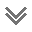

In [4]:
html.content

# **2- Parse html**


**1. Parse html with BeautifulSoup**

**2. Search for the required table "main_table_countries_today"**



In [5]:
html = BeautifulSoup(html.content)

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"
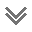

In [6]:
html

In [7]:
table = html.find('table',attrs={'id':"main_table_countries_today"})

In [8]:
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [9]:
rows = table.find_all('tr')

In [10]:
rows[4]

<tr class="total_row_world row_continent" data-continent="Europe" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>Europe</nobr>
</td>
<td>186,328,975</td>
<td>+24,667</td>
<td>1,797,885</td>
<td>+319</td>
<td>167,719,089</td>
<td>+287,881</td>
<td>16,812,001</td>
<td>9,329</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="Europe" style="display:none;">Europe</td>
<td>
</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>

In [11]:
rows[4].text.strip()

'Europe\n\n186,328,975\n+24,667\n1,797,885\n+319\n167,719,089\n+287,881\n16,812,001\n9,329\n\n\n\n\n\nEurope'

# **3- Strore data**

1.  Store rows into list (data)
2.  Convert list into DataFrame
3.  Check the DataFrame
4.  Set the first row as the header, and remove the second row
5.  Check the DataFrame
6.  Save as csv file




In [12]:
data_lists = []
for x in rows:
  data_lists.append(x.text.strip().split('\n')[1:5])

In [13]:
data_lists

[['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths'],
 ['', '97,361,378', '', '1,452,686'],
 ['', '145,380,418', '+183,341', '1,415,004'],
 ['', '56,535,148', '', '1,291,817'],
 ['', '186,328,975', '+24,667', '1,797,885'],
 ['', '6,455,211', '+47,021', '9,969'],
 ['', '11,822,034', '', '253,376'],
 ['', '15', '', '706'],
 ['503,883,885', '+255,029', '6,220,752', '+825'],
 ['USA', '82,295,768', '', '1,015,357 '],
 ['India', '43,040,947', '', '521,776 '],
 ['Brazil', '30,247,302', '', '661,960 '],
 ['France', '27,572,791', '', '144,061 '],
 ['Germany', '23,365,504', '', '133,306 '],
 ['UK', '21,747,638', '', '171,396 '],
 ['Russia', '18,064,454', '+11,095', '373,267 '],
 ['S. Korea', '16,212,751', '+107,882', '20,889 '],
 ['Italy', '15,595,302', '', '161,469 '],
 ['Turkey', '14,987,583', '', '98,532 '],
 ['Spain', '11,662,214', '', '103,266 '],
 ['Vietnam', '10,394,533', '', '42,924 '],
 ['Argentina', '9,059,944', '', '128,327 '],
 ['Netherlands', '8,015,576', '', '22,156 '],
 ['J

In [14]:
df = pd.DataFrame(data_lists)

In [15]:
df.head()

0            1         2            3
0  Country,Other   TotalCases  NewCases  TotalDeaths
1                  97,361,378              1,452,686
2                 145,380,418  +183,341    1,415,004
3                  56,535,148              1,291,817
4                 186,328,975   +24,667    1,797,885

In [16]:
df = pd.DataFrame(data_lists[9:], columns=data_lists[0])

In [17]:
df.head()

Country,Other  TotalCases NewCases TotalDeaths
0           USA  82,295,768           1,015,357 
1         India  43,040,947             521,776 
2        Brazil  30,247,302             661,960 
3        France  27,572,791             144,061 
4       Germany  23,365,504             133,306

In [18]:
df.to_csv('data_covid.csv')

# **4- visualize**


1. Get the required columns.
2. Get first 10 rows
3. Check the DataFrame
4. Remove commas in digits, and convert string to int
5. Check DataFrame
6. plot bar






In [19]:
df_plot = df[['Country,Other','TotalCases']]

In [20]:
df_plot.head(10)

Country,Other  TotalCases
0           USA  82,295,768
1         India  43,040,947
2        Brazil  30,247,302
3        France  27,572,791
4       Germany  23,365,504

In [21]:
df_plot['TotalCases'] = df_plot['TotalCases'].apply(lambda x: x.replace(',',''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_plot

Country,Other TotalCases
0             USA   82295768
1           India   43040947
2          Brazil   30247302
3          France   27572791
4         Germany   23365504
..            ...        ...
231   186,328,975     +24667
232     6,455,211     +47021
233    11,822,034           
234           721           
235   503,883,885    +255029

[236 rows x 2 columns]

In [23]:
df_plot.describe()

Country,Other TotalCases
count            236        236
unique           236        232
top              USA           
freq               1          4

In [24]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country,Other  236 non-null    object
 1   TotalCases     236 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [25]:
df_plot['TotalCases'] = pd.to_numeric(df_plot['TotalCases'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_plot.isnull().sum()

Country,Other    0
TotalCases       4
dtype: int64

In [27]:
df_plot = df_plot.dropna()

In [28]:
df_plot

Country,Other  TotalCases
0             USA  82295768.0
1           India  43040947.0
2          Brazil  30247302.0
3          France  27572791.0
4         Germany  23365504.0
..            ...         ...
227         China    178764.0
229   145,380,418    183341.0
231   186,328,975     24667.0
232     6,455,211     47021.0
235   503,883,885    255029.0

[232 rows x 2 columns]

In [29]:
df_plot.isnull().sum()

Country,Other    0
TotalCases       0
dtype: int64

In [30]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 235
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country,Other  232 non-null    object 
 1   TotalCases     232 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.4+ KB


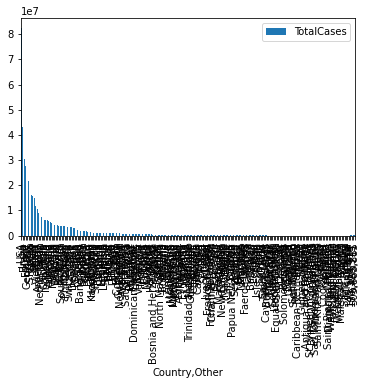

In [31]:
df_plot.plot(kind='bar',x='Country,Other',y='TotalCases')

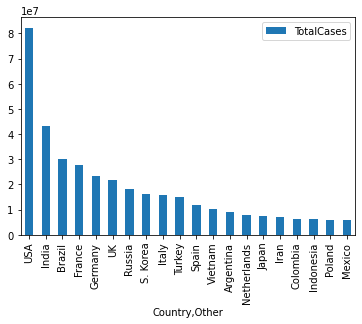

In [32]:
df_plot[:20].plot(kind='bar',x='Country,Other',y='TotalCases')

In [33]:
df_plot[:20]

Country,Other  TotalCases
0            USA  82295768.0
1          India  43040947.0
2         Brazil  30247302.0
3         France  27572791.0
4        Germany  23365504.0
5             UK  21747638.0
6         Russia  18064454.0
7       S. Korea  16212751.0
8          Italy  15595302.0
9         Turkey  14987583.0
10         Spain  11662214.0
11       Vietnam  10394533.0
12     Argentina   9059944.0
13   Netherlands   8015576.0
14         Japan   7287343.0
15          Iran   7204049.0
16      Colombia   6089381.0
17     Indonesia   6038664.0
18        Poland   5984940.0
19        Mexico   5725075.0